In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from pprint import pprint

In [ ]:
#loading training and testing dataset
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data', header=None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data', header=None)

The data I am using is from UCI machine learning repository. They already have splitted dataset. Hence no need of splitting data to train and test.

In [ ]:
#creating columns
train.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Label']
test.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Label']

In [ ]:
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
#description of training dataset
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [ ]:
#displaying shape of training dataset
train.shape

(25010, 11)

In [ ]:
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [ ]:
#decription of testing dataset
test.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Label
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [ ]:
#displaying shape of testing dataset
test.shape

(1000000, 11)

In [ ]:
#Checking for null values in training dataset
train.isnull().sum()

S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
Label    0
dtype: int64

In [ ]:
#checking for null values in testing dataset
test.isnull().sum()

S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
Label    0
dtype: int64

No null values in training and testing dataset

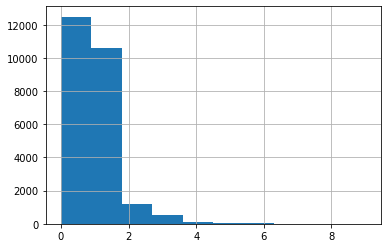

In [ ]:
#visualization of traning dataset
train['Label'].hist()

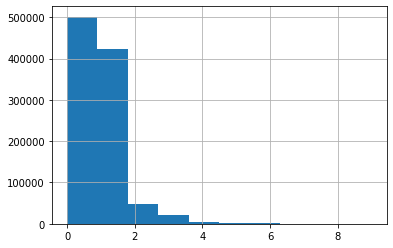

In [ ]:
#visualization of testing dataset
test['Label'].hist()

In [ ]:
#Extracting dataset 
X_train = train.loc[:,train.columns != 'Label']
X_test = test.loc[:,train.columns != 'Label']

In [ ]:
#scaling dataset using standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = train['Label']
y_test = test['Label']

**KNN - K Nearest Neighbors classifier**

In [ ]:
#starting the KNN model
knn = KNeighborsClassifier()
paramKnn = {'n_neighbors':[5,10,40,80,100,150,200], 'leaf_size':[1,2,3,5], 'n_jobs':[-1]}
model_names = ["KNN"]
#tuning KNN with sklearn using RandomSearchCV
#setting cross validation = 3
knn3 = RandomizedSearchCV(estimator = knn, param_distributions = paramKnn, cv = 3, n_jobs =-1, verbose = 2)
cv_3 = cross_val_score(knn3, X_train, y_train, cv=3)
print(cv_3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[0.54540002 0.54372076 0.54258637]


In [ ]:
#fitting the KNN model
knn3.fit(X_train, y_train)
print(knn3.best_params_)
best_random =knn3.best_estimator_
best_random.fit(X_train, y_train)
y_pred3=best_random.predict(X_test)
#displaying the accuracy
a = accuracy_score(y_test, y_pred3)
print("Accuracy Using" + str(a)+'\n')
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_neighbors': 100, 'n_jobs': -1, 'leaf_size': 1}
Accuracy Using0.545692



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.79      0.66    501209
           1       0.51      0.35      0.42    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.55   1000000
   macro avg       0.11      0.11      0.11   1000000
weighted avg       0.50      0.55      0.51   1000000

[[396749 104460      0      0      0      0      0      0      0      0]
 [273555 148943      0      0      0      0      0      0      0      0]
 [ 25295  22327      0      0      0      0      0      0      0      0]
 [  8313  12808      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


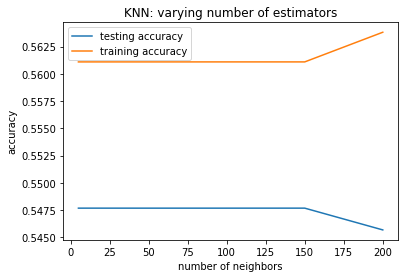

In [ ]:
#storing train and test data where cv=3 in array
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

for i, k in enumerate(n_neighbors_KNN):
  clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = paramKnn, cv = 3, n_jobs = -1, verbose = 2)
  clf_KNN.fit(X_train, y_train)
  train_accuracy[i] = clf_KNN.score(X_train, y_train)
  test_accuracy[i] = clf_KNN.score(X_test, y_test)

  #plotting the accuracy for cv = 3
plt.title('KNN: varying number of estimators')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'testing accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'training accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.show()

In [ ]:
#starting KNN model for cv = 10
knn = KNeighborsClassifier()
paramKnn ={'n_neighbors':[5,10,40,80,100,150,200], 'leaf_size':[1,2,3,5], 'n_jobs':[-1]}
model_names = ["KNN"]
knn10 = RandomizedSearchCV(estimator = knn, param_distributions = paramKnn, cv = 10, n_jobs = -1, verbose = 2)
cv_10 = cross_val_score(knn10, X_train, y_train,cv=3)
print(cv_10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


[0.54575987 0.54372076 0.5475048 ]


In [ ]:
#fitting model for cv = 10
knn10.fit(X_train, y_train)
print(knn10.best_params_)
best_random =knn10.best_estimator_
best_random.fit(X_train, y_train)
y_pred10=best_random.predict(X_test)
a = accuracy_score(y_test, y_pred10)
print('accuracy using' + str(a)+'\n')
print(classification_report(y_test,y_pred10))
print(confusion_matrix(y_test, y_pred10))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


{'n_neighbors': 200, 'n_jobs': -1, 'leaf_size': 5}
accuracy using0.548308



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.83      0.67    501209
           1       0.52      0.32      0.39    422498
           2       0.00      0.00      0.00     47622
           3       0.00      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.55   1000000
   macro avg       0.11      0.11      0.11   1000000
weighted avg       0.50      0.55      0.50   1000000

[[413515  87694      0      0      0      0      0      0      0      0]
 [287705 134793      0      0      0      0      0      0      0      0]
 [ 26292  21330      0      0      0      0      0      0      0      0]
 [  9041  12080      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


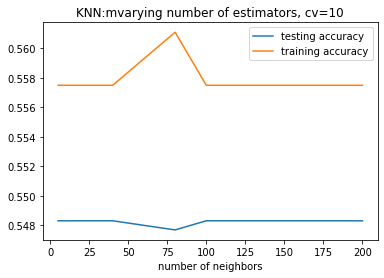

In [ ]:
#storing train and test data where cv = 10 in array
n_neighbors_KNN = [5,10,40,80,100,150,200]
train_accuracy = np.empty(len(n_neighbors_KNN))
test_accuracy = np.empty(len(n_neighbors_KNN))

for i,k in enumerate(n_neighbors_KNN):
  clf_KNN = RandomizedSearchCV(estimator = KNeighborsClassifier(k), param_distributions = paramKnn,  cv = 10, n_jobs = -1, verbose = 2)
  clf_KNN.fit(X_train, y_train)
  train_accuracy[i] = clf_KNN.score(X_train, y_train)
  test_accuracy[i] = clf_KNN.score(X_test, y_test)
  
#plotting the accuracy for cv =10
plt.title('KNN:mvarying number of estimators, cv=10')
plt.plot(n_neighbors_KNN, test_accuracy, label = 'testing accuracy')
plt.plot(n_neighbors_KNN, train_accuracy, label = 'training accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.show()


Accuracy I got in KNN model is around 55%

**SVM - Support Vector Machine**

In [ ]:
#starting SVM for cv = 3
paramSVM = { 'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1], 'decision_function_shape':['ovr'] }
svm = SVC()
svmsearch3 = RandomizedSearchCV(estimator = svm, param_distributions = paramSVM, cv = 3, n_jobs = -1, verbose = 2)


In [ ]:
#fitting SVM model
svm_3 = svmsearch3.fit(X_train, y_train)
print("best CV3 params", svm_3.best_params_)
print("best CV3 accuracy", svm_3.best_score_)
y_predsvm3 = svm_3.predict(X_test)
accuracysvm3 = accuracy_score(y_test, y_predsvm3)
print('accuracy of svm_3 classifier: {:.3f}'.format(accuracysvm3))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
best CV3 params {'gamma': 0.1, 'decision_function_shape': 'ovr', 'C': 10}
best CV3 accuracy 0.5556973933388695
accuracy of svm_3 classifier: 0.560


In [ ]:
np.unique(y_predsvm3)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

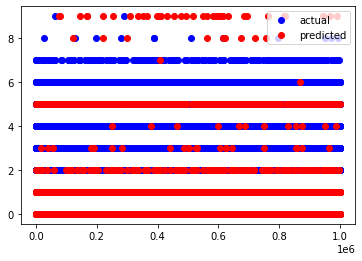

In [ ]:
#plotting svm model where cv = 3
plt.plot(y_test, 'bo', label = 'actual')
plt.plot(y_predsvm3, 'ro', label = 'predicted')
plt.legend()
plt.show()

In [ ]:
#starting SVM for cv = 10
paramSVM = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01,0.1], 'decision_function_shape':['ovr'] }
svmsearch10 = RandomizedSearchCV(estimator = svm, param_distributions = paramSVM, cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
#fitting SVM model
svm_10 = svmsearch3.fit(X_train, y_train) 
print("Best CV10 params", svm_10.best_params_)
print("Best CV10 accuracy", svm_10.best_score_) 
y_predsvm10 = svm_10.predict (X_test)
accuracysvm10 = accuracy_score(y_test, y_predsvm10) 
print('Accuracy of SVM 10 Classifier: {:.3f}'.format(accuracysvm10))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best CV10 params {'gamma': 0.1, 'decision_function_shape': 'ovr', 'C': 10}
Best CV10 accuracy 0.5556973933388695
Accuracy of SVM 10 Classifier: 0.560


In [ ]:
#displaying in matrix
con = confusion_matrix(y_test.values, y_predsvm3)
con

array([[366961, 134214,      4,      0,      2,     26,      0,      0,
             0,      2],
       [229660, 192719,     65,      6,      5,     16,      0,      1,
             5,     21],
       [ 19705,  27869,     35,      9,      2,      0,      1,      0,
             0,      1],
       [  5749,  15341,     25,      4,      2,      0,      0,      0,
             0,      0],
       [    82,   3798,      1,      0,      1,      0,      0,      0,
             0,      3],
       [  1324,    225,      0,      0,      0,    435,      0,      0,
             4,      8],
       [   299,   1114,      9,      2,      0,      0,      0,      0,
             0,      0],
       [    16,    209,      3,      2,      0,      0,      0,      0,
             0,      0],
       [     1,      6,      0,      0,      0,      5,      0,      0,
             0,      0],
       [     0,      2,      0,      0,      0,      0,      0,      0,
             0,      1]])

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


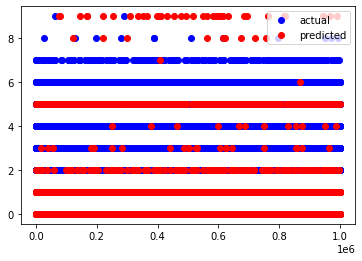

In [ ]:
#plotting svm model for cv = 10
plt.plot(y_test, 'bo', label='actual')
plt.plot(y_predsvm10, 'ro', label='predicted')
plt.legend()
plt.show()

Accuracy I got in SVM model is 56%

**Decision Tree**

In [ ]:
#setting up parameter grid for decision tree
decision = DecisionTreeClassifier()
print('parameters currently in use:\n')
pprint(decision.get_params())
parameters={'min_samples_split': range(10,500,20), 'max_depth': range(1,20,2)}

parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [ ]:
#tuning hyperparameter by RandomSearchCV where cv = 3
decision_random3 = RandomizedSearchCV(estimator = decision,param_distributions = parameters, n_iter = 50, cv = 3, verbose =2, 
                                      random_state=42, n_jobs = -1)
decision_random3.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 20, 2),
                                        'min_samples_split': range(10, 500, 20)},
                   random_state=42, verbose=2)

In [ ]:
#displaying accuracy where cv = 3
print("best cv3 params", decision_random3.best_params_)
print("best cv3 accuracy", decision_random3.best_score_)

best cv3 params {'min_samples_split': 110, 'max_depth': 15}
best cv3 accuracy 0.5413845786932444


In [ ]:
#extracting estimator from cv = 3
decision_best3 = decision_random3.best_estimator_

In [ ]:
#tuning hyperparameter by RandomSearchCV where cv = 10
decision_random10 = RandomizedSearchCV(estimator = decision, param_distributions = parameters, n_iter = 50, cv = 10, verbose = 2, 
                                       random_state=42, n_jobs=-1)
decision_random10.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 20, 2),
                                        'min_samples_split': range(10, 500, 20)},
                   random_state=42, verbose=2)

In [ ]:
#displaying accuracy where cv = 10
print("best cv-10 params", decision_random10.best_params_)
print("best cv-10 accuracy", decision_random10.best_score_)

best cv-10 params {'min_samples_split': 110, 'max_depth': 15}
best cv-10 accuracy 0.5438224710115953


In [ ]:
#Extracting estimator from cv = 10
decision_best10 = decision_random10.best_estimator_

Accuracy I got in decision tree model is 54%

**Bagging classifier**

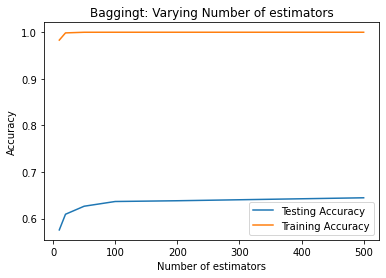

In [ ]:
#storing train and test data in array
estimators = [10, 20, 50, 100, 200, 500] 
train_accuracy = np.empty(len (estimators)) 
test_accuracy = np.empty(len(estimators))

for i, k in enumerate(estimators):
  bag = BaggingClassifier(n_estimators=k)
  bag.fit(X_train, y_train) 
  train_accuracy[i] = bag.score(X_train, y_train)
  test_accuracy[i] = bag.score(X_test, y_test)

#plotting accuracy
plt.title('Baggingt: Varying Number of estimators')
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel("Number of estimators")
plt.ylabel('Accuracy')
plt.show()


In [ ]:
#using decision tree as base estimator for cv = 3
bag3 = BaggingClassifier(base_estimator=decision_best3, n_estimators=500, n_jobs=-1)

In [ ]:
#fitting bagging classifier
bag3.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        min_samples_split=110),
                  n_estimators=500, n_jobs=-1)

In [ ]:
#displaying accuracy
y_pred3=bag3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print('accuracy of bagging:{:.3f}'.format(accuracy3))

accuracy of bagging:0.610


In [ ]:
#using decision tree as base estimator for cv = 10
bag10 = BaggingClassifier(base_estimator = decision_best10, n_estimators=500, n_jobs=-1)
bag10.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        min_samples_split=110),
                  n_estimators=500, n_jobs=-1)

In [ ]:
#displaying accuracy
y_pred10=bag10.predict(X_test)
accuracy10 = accuracy_score(y_test, y_pred10)
print('accuracy of 10 dt:{:.3f}'.format(accuracy10))

accuracy of 10 dt:0.610


The accuracy I got in Bagging Classifier is 61% which is the greatest 

**Random Forest**

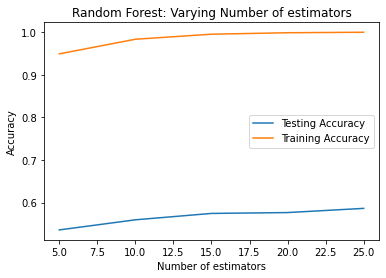

In [ ]:
#storing data in array where setting n-estimator = 25 
estimators = [5,10,15,20,25] 
train_accuracy = np.empty (len(estimators))
test_accuracy = np.empty(len (estimators))

for i, k in enumerate(estimators):
  random = RandomForestClassifier(n_estimators=k)
  random.fit(X_train, y_train)
  train_accuracy[i] = random.score(X_train, y_train)
  test_accuracy[i] = random.score(X_test, y_test)
  
#plotting accuracy
plt.title('Random Forest: Varying Number of estimators') 
plt.plot(estimators, test_accuracy, label='Testing Accuracy')
plt.plot(estimators, train_accuracy, label='Training Accuracy') 
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel("Accuracy")
plt.show()


In [ ]:
#validating in cv = 3
random=RandomForestClassifier (n_estimators=25)
cv_3 = cross_val_score (random, X_train, y_train, cv=3)
print(cv_3)
print("Average 3-Fold CV Score: {}".format(np.mean(cv_3)))

[0.57958498 0.56723042 0.57785509]
Average 3-Fold CV Score: 0.5748901625319408


In [ ]:
#validating in cv = 10
random=RandomForestClassifier(n_estimators=25)
cv_10 = cross_val_score(random, X_train, y_train, cv=10)
print(cv_10)
print("average 10 fold cv score: {}".format(np.mean(cv_10)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  UserWarning,


[0.58416633 0.58296681 0.58056777 0.58136745 0.58576569 0.59456218
 0.57457017 0.59696122 0.60015994 0.58136745]
average 10 fold cv score: 0.5862455017992804


The accuracy I got in Random Forest model is 58% in cv = 10 and 57% in cv = 3. 10 fold cross validation has performed well than 3 fold cross validation 